# Image Processing

In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

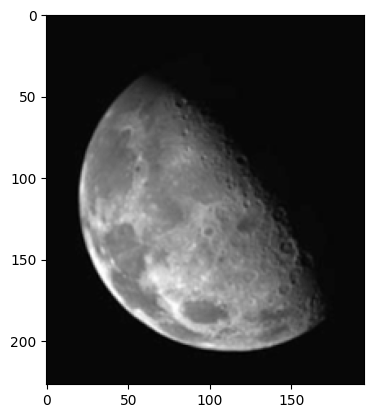

In [2]:
# Save image in set directory
# Read RGB image
img = cv2.imread('images/moon.bmp') 
 
# Output img with window name as 'image'
img1 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img1, cmap = 'grey')


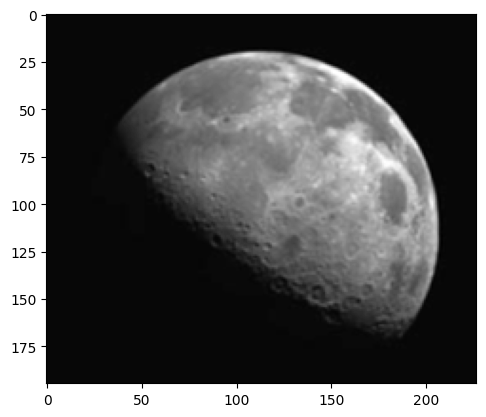

In [3]:
img2 = img1.T
plt.imshow(img2, cmap = 'grey')


r,c =  1729 1921
r,c =  3842 3458


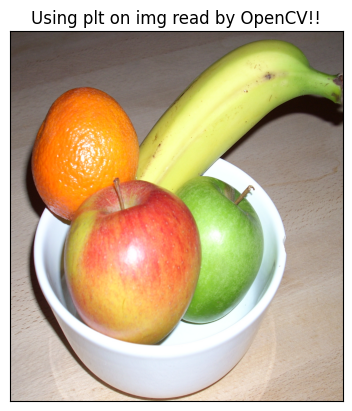

In [4]:
img = cv2.imread("../../Images/bowl_fruit.png ")
r,c = img.shape[:2]
print ('r,c = ', r,c)
resized_img = cv2.resize(img, (2*r,2*c), interpolation=cv2.INTER_CUBIC)
r,c = resized_img.shape[:2]
print ('r,c = ', r,c)
cv2.imwrite("resized_bowl.jpg", resized_img)
plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_RGB2BGR))
plt.xticks([]), plt.yticks([])#to hide tick values on X and Y axis
plt.title("Using plt on img read by OpenCV!!")
plt.show()           

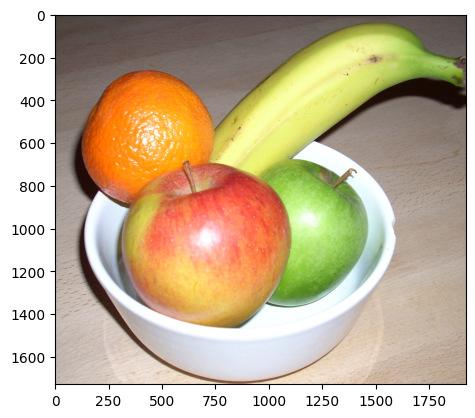

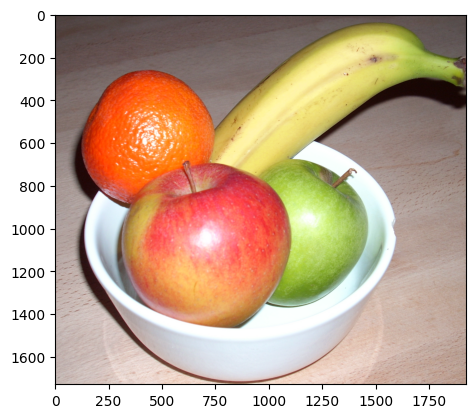

In [5]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
plt.imshow(cv2.cvtColor(img_hsv, cv2.COLOR_HSV2BGR))
plt.show()
img_hsv[:, :, 0,] = img_hsv[:, :, 0,]+5
plt.imshow(cv2.cvtColor(img_hsv, cv2.COLOR_HSV2BGR))


151 151


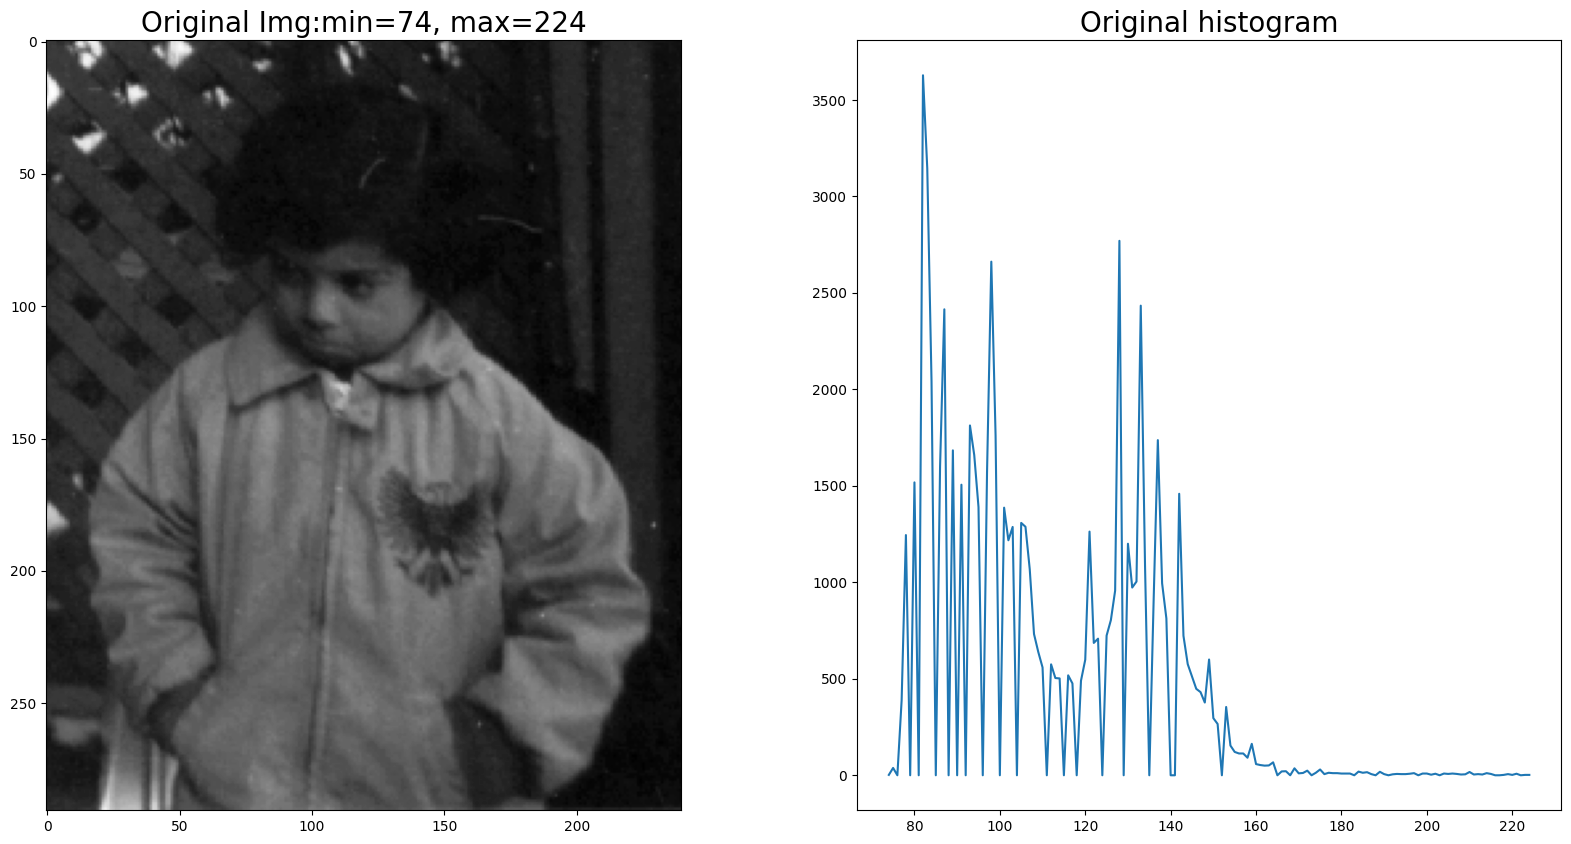

In [8]:
#Histogram calculation
from skimage import io
from skimage.exposure import histogram
img0 = io.imread('../../Images/pout.tif')
hist0=histogram(img0)
print(len(hist0[0]),len(hist0[1]))
mini=np.min(img0)
maxi=np.max(img0)
plt.figure(figsize=(20, 10))
plt.subplot(1,2,1), plt.imshow(img0, cmap='gray') ,plt.title('Original Img:min={}, max={}'.format(mini, maxi),  fontsize=20)
grays=np.linspace(mini,maxi,len(hist0[0])) #take both values and divide by third value (create new vector start with min end at max that has element amount of len)
plt.subplot(1,2,2), plt.plot(grays,hist0[0]) ,plt.title('Original histogram',  fontsize=20);


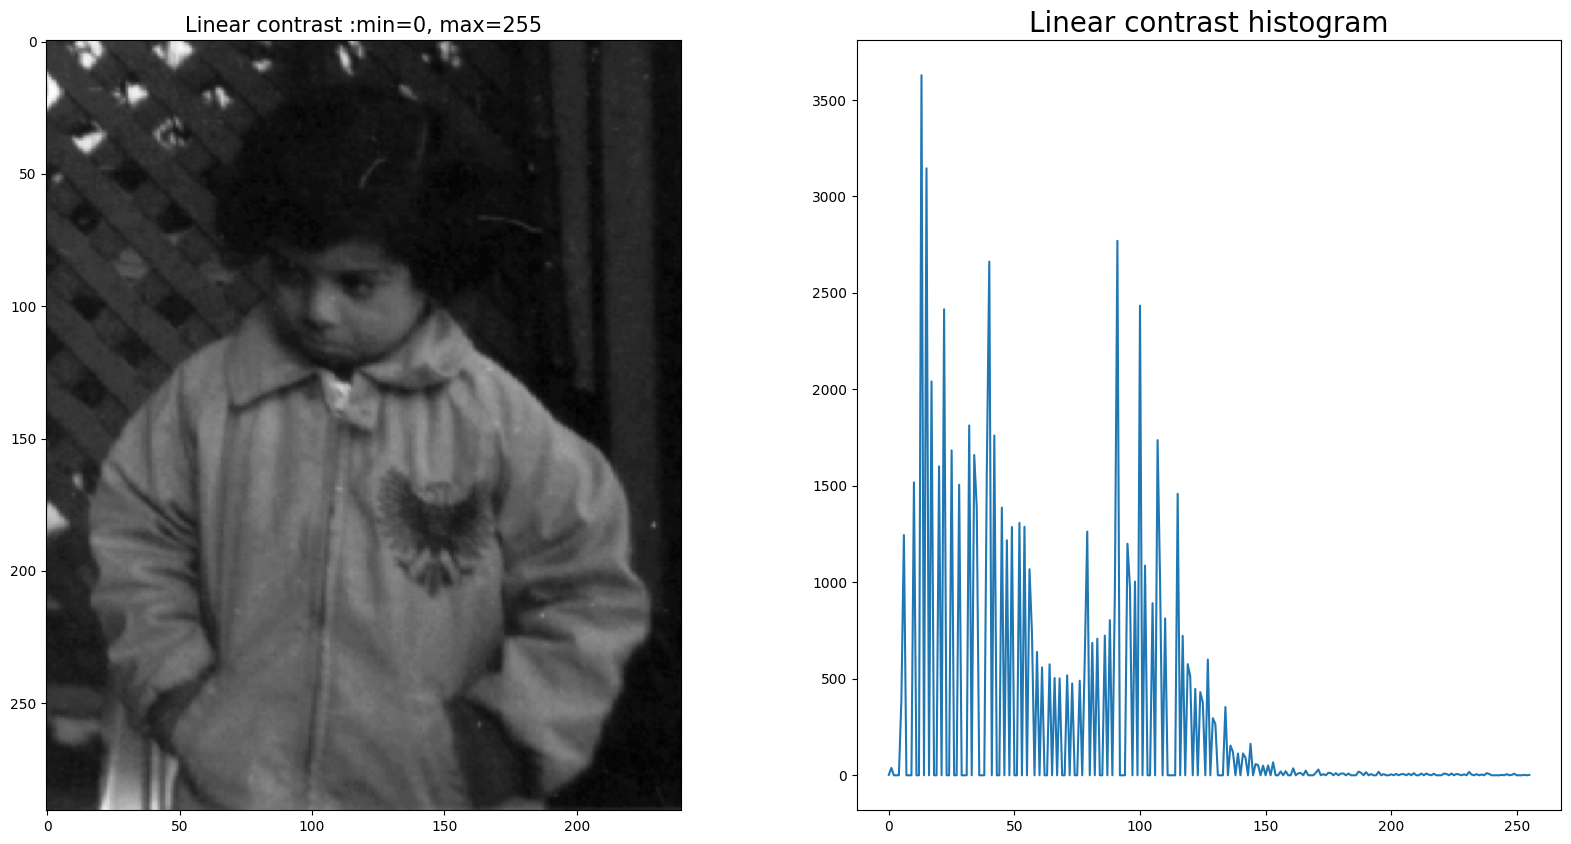

In [9]:
#Apply linear transform to increase the contrast
#You may also use rescale_intensity function from exposure module
newMax=255; newMin=0
img1=np.uint8((img0-mini)/(maxi-mini)*(newMax-newMin) + newMin)
hist1=histogram(img1)
minVal=np.min(img1)
maxVal=np.max(img1)
plt.figure(figsize=(20, 10))
plt.subplot(1,2,1), plt.imshow(img1, cmap='gray') ,plt.title('Linear contrast :min={}, max={}'.format(minVal, maxVal),  fontsize=15)
grays=np.linspace(minVal,maxVal,len(hist1[0]))
plt.subplot(1,2,2), plt.plot(grays,hist1[0]) ,plt.title('Linear contrast histogram',  fontsize=20);


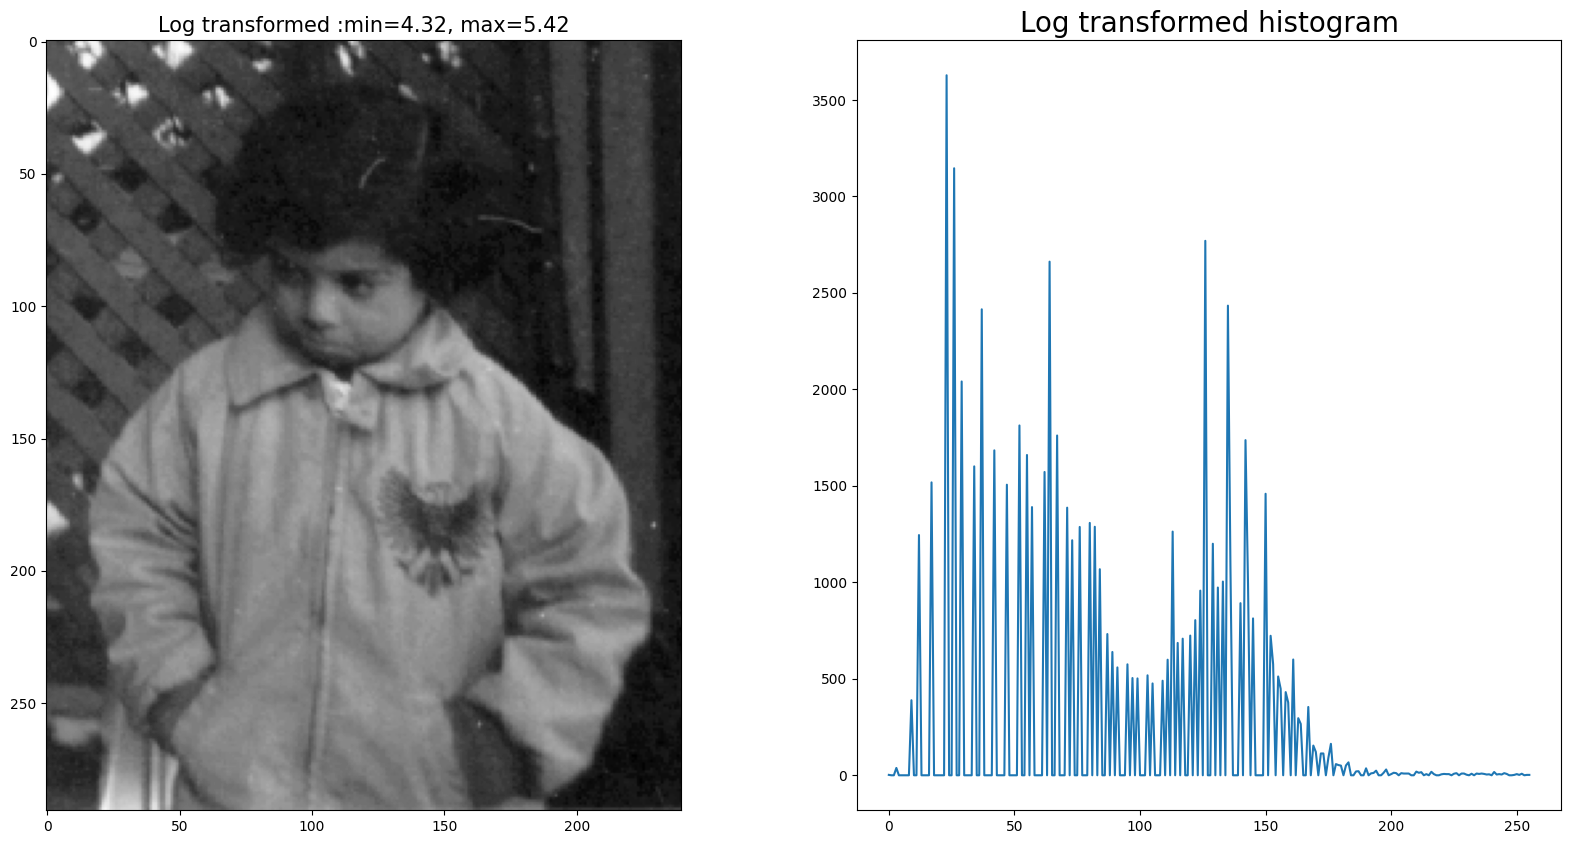

In [10]:
#Apply logarithm transform
ones=np.ones(img0.shape)
img0=img0+ones
logImg=np.log(img0)
hist2=histogram(logImg)
mini=np.min(logImg)
maxi=np.max(logImg)
plt.figure(figsize=(20, 10))
plt.subplot(1,2,1),plt.imshow(logImg, cmap='gray'),plt.title('Log transformed :min=%.2f, max=%.2f'%(mini, maxi),  fontsize=15)
grays=np.linspace(minVal,maxVal,len(hist2[0]))
plt.subplot(1,2,2), plt.plot(grays,hist2[0]) ,plt.title('Log transformed histogram',  fontsize=20);


216 216


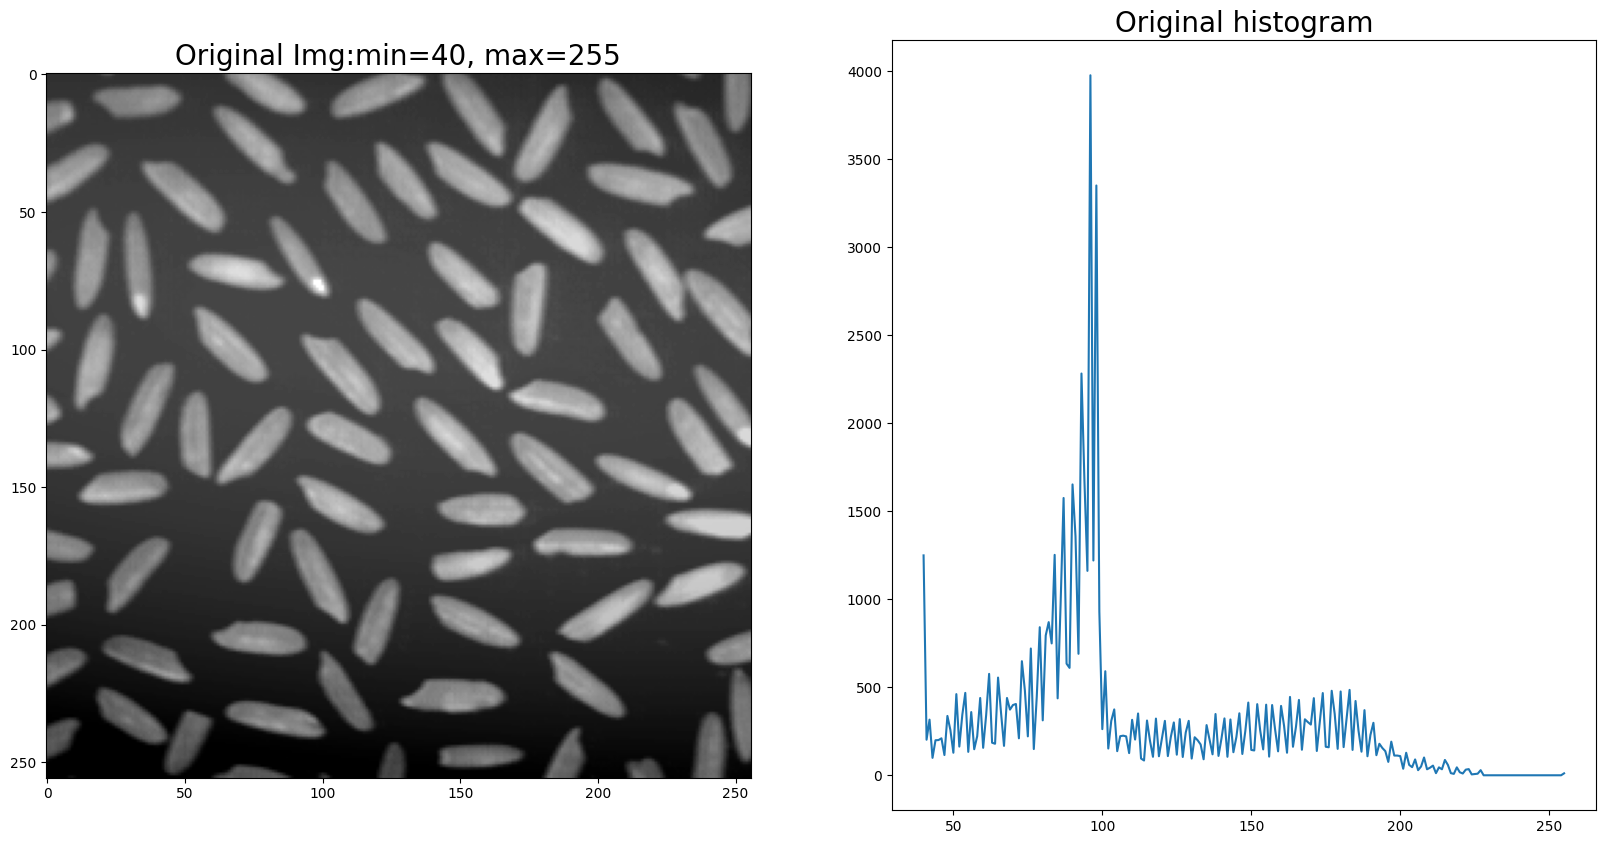

In [11]:
#Histogram calculation
from skimage import io
from skimage.exposure import histogram
img4 = io.imread('../../Images/rice.tif')
hist0=histogram(img4)
print(len(hist0[0]),len(hist0[1]))
mini=np.min(img4)
maxi=np.max(img4)
plt.figure(figsize=(20, 10))
plt.subplot(1,2,1), plt.imshow(img4, cmap='gray') ,plt.title('Original Img:min={}, max={}'.format(mini, maxi),  fontsize=20)
grays=np.linspace(mini,maxi,len(hist0[0])) #take both values and divide by third value (create new vector start with min end at max that has element amount of len)
plt.subplot(1,2,2), plt.plot(grays,hist0[0]) ,plt.title('Original histogram',  fontsize=20);


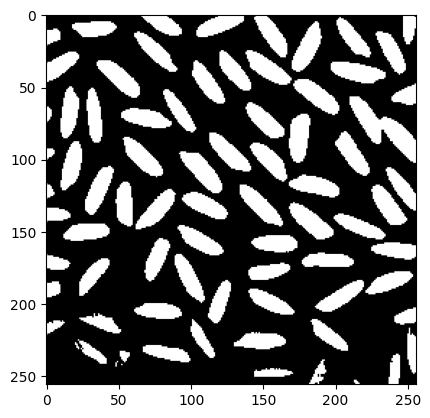

In [22]:
img = cv2.imread('../../Images/rice.tif', cv2.IMREAD_GRAYSCALE)

# Thresholding the image placing 120 intensity level as threshold
ret, thresh1 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + 
                                            cv2.THRESH_OTSU) 
# Displaying the output image
plt.imshow(thresh1, cmap= 'gray')


In [23]:
ret

125.0

In [34]:
from skimage import measure, color
labels = measure.label(thresh1)
print(labels.max())

79


In [35]:
props = measure.regionprops(labels)

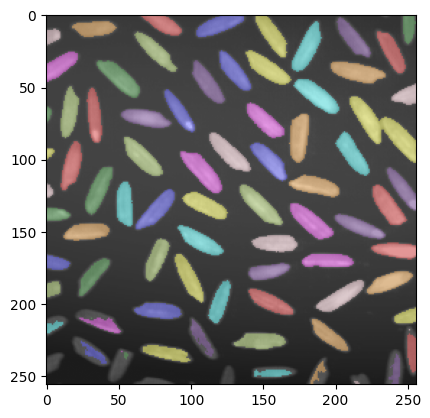

In [36]:
plt.imshow(color.label2rgb(labels, image = img, bg_label=0))

In [49]:
#Unsharp
ddepth = -1#cv.CV_32F
size = 3
#k=-0.2
kernel_mean = np.ones((size, size))

kernel_mean=kernel_mean/9
print(kernel_mean)
print('weight sum=', kernel_mean.sum())

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]
weight sum= 1.0


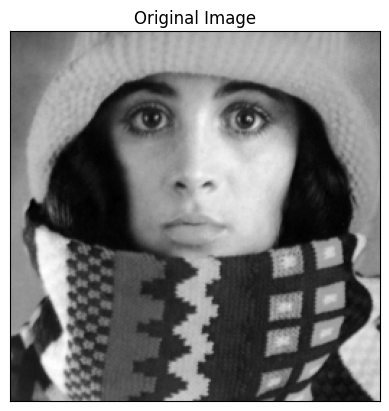

In [67]:
img = cv2.imread('../../Images/trui.png') 
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img, cmap= 'gray')
plt.xticks([]), plt.yticks([])#to hide tick values on X and Y axis
plt.title("Original Image")
plt.show()    
#gray_img = cv2.GaussianBlur(img, (size, size),0)

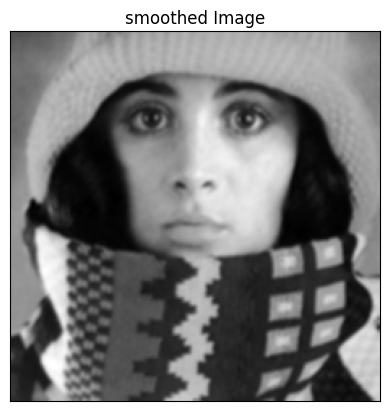

In [68]:
unsharpened = cv2.filter2D(img,ddepth , kernel_mean)
plt.imshow(unsharpened, cmap= 'gray')
plt.xticks([]), plt.yticks([])#to hide tick values on X and Y axis
plt.title("smoothed Image")
plt.show()    

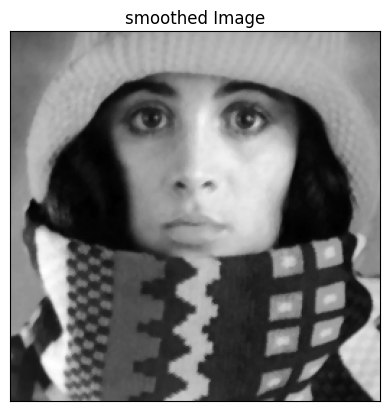

In [69]:
from skimage import filters

denoised = filters.median(img)
plt.imshow(denoised, cmap= 'gray')
plt.xticks([]), plt.yticks([])#to hide tick values on X and Y axis
plt.title("smoothed Image")
plt.show()    

Text(0.5, 1.0, 'median filter Image')

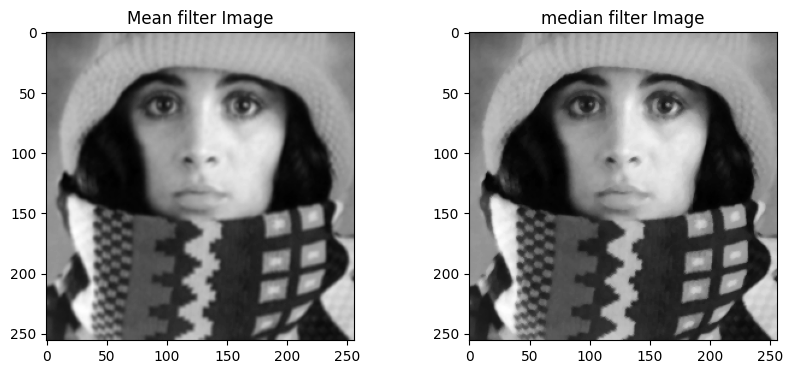

In [70]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
# Plot data on the first subplot (ax1)
ax1.imshow(unsharpened, cmap= 'gray')
ax1.set_title("Mean filter Image")

# Plot data on the second subplot (ax2)
ax2.imshow(denoised, cmap= 'gray')
ax2.set_title("median filter Image")


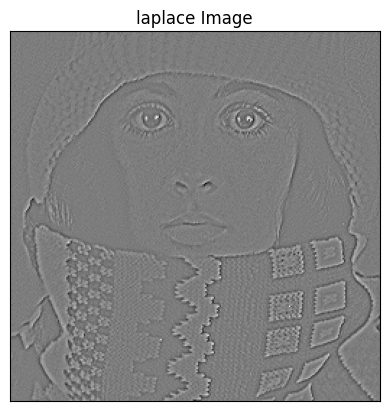

In [81]:
edges = filters.laplace(img, ksize=5)
plt.imshow(edges, cmap= 'gray')
plt.xticks([]), plt.yticks([])#to hide tick values on X and Y axis
plt.title("laplace Image")
plt.show()    

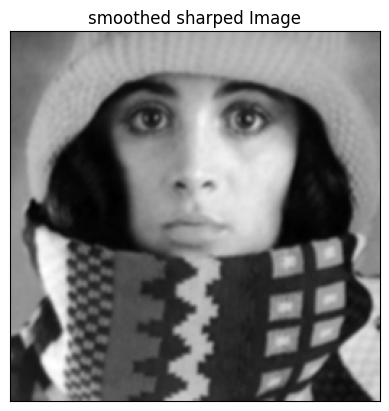

In [82]:
new = unsharpened + edges 
plt.imshow(new, cmap= 'gray')
plt.xticks([]), plt.yticks([])#to hide tick values on X and Y axis
plt.title("smoothed sharped Image")
plt.show()    

Text(0.5, 1.0, 'unsharpened - 2 edges')

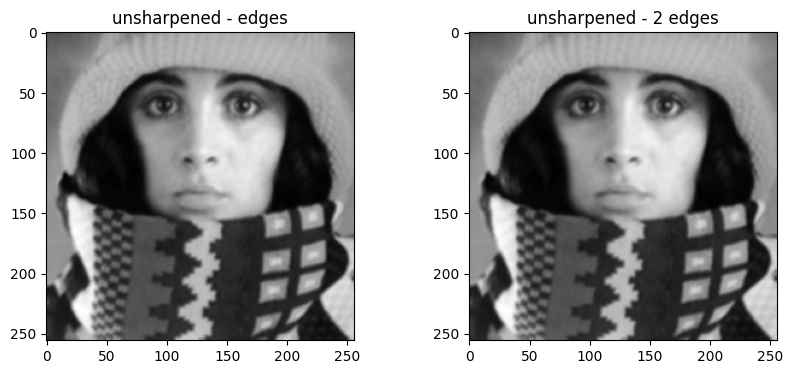

In [83]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
# Plot data on the first subplot (ax1)
ax1.imshow((unsharpened - edges) , cmap= 'gray')
ax1.set_title("unsharpened - edges")

# Plot data on the second subplot (ax2)
ax2.imshow((unsharpened - 2*edges) , cmap= 'gray')
ax2.set_title("unsharpened - 2 edges")

In [85]:
edges = cv2.Canny(img, threshold1=100, threshold2=200)  # Adjust thresholds as needed


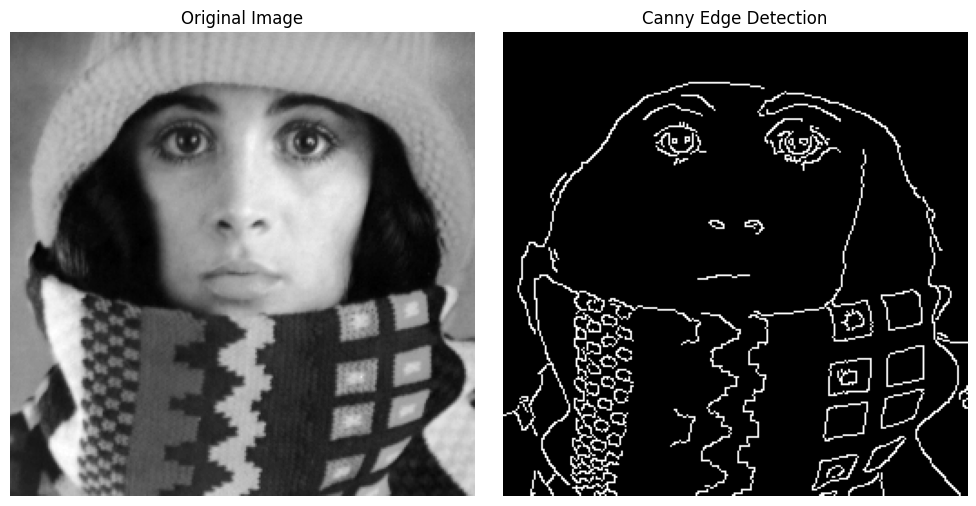

In [87]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original Image')

axes[1].imshow(edges, cmap='gray')
axes[1].set_title('Canny Edge Detection')

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()